<a href="https://colab.research.google.com/github/Toms201/ISYS2001-Assignment2/blob/main/Assignment_Testing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

ISYS2008 ASSIGNMENT 2


In [1]:
#Run the !wget function to download the database from the hosted platform. Save the database as enron.db in files. 
!wget -O enron.db https://curtin-my.sharepoint.com/:u:/g/personal/211934g_curtin_edu_au/EaYagsqa2r1Bi5wtHbswGFwBH2kd2uTnz6rlka7GI36GUQ?download=1
output.clear()
print("Required data installed")

--2022-05-11 10:13:46--  https://curtin-my.sharepoint.com/:u:/g/personal/211934g_curtin_edu_au/EaYagsqa2r1Bi5wtHbswGFwBH2kd2uTnz6rlka7GI36GUQ?download=1
Resolving curtin-my.sharepoint.com (curtin-my.sharepoint.com)... 52.105.220.39
Connecting to curtin-my.sharepoint.com (curtin-my.sharepoint.com)|52.105.220.39|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: /personal/211934g_curtin_edu_au/Documents/ISYS2001-Assignment-2-Data/enron_sqlite3.db?ga=1 [following]
--2022-05-11 10:13:47--  https://curtin-my.sharepoint.com/personal/211934g_curtin_edu_au/Documents/ISYS2001-Assignment-2-Data/enron_sqlite3.db?ga=1
Reusing existing connection to curtin-my.sharepoint.com:443.
HTTP request sent, awaiting response... 200 OK
Length: 853819392 (814M) [application/octet-stream]
Saving to: ‘enron.db’

enron.db            100%[===================>] 814.27M  11.5MB/s    in 77s     

2022-05-11 10:15:05 (10.5 MB/s) - ‘enron.db’ saved [853819392/853819392]



NameError: ignored

In [2]:
#Import SQL Lite 3
import sqlite3

#connect sqlite to database that has been created Superheroes.db
conn = sqlite3.connect("enron.db")

#Create a cursor (like a row/row scanner)
cur = conn.cursor()

In [3]:
sql='''
SELECT name FROM sqlite_master WHERE type='table';
'''
cur.execute(sql)
cur.fetchall()

[('employeelist',), ('message',), ('recipientinfo',), ('referenceinfo',)]

In [4]:
import pandas as pd

sql='''
SELECT * from message;
'''
# Load the data into a DataFrame
df = pd.read_sql_query(sql, conn)
df

#Count 10 times (for top 10)
n = 10

#In the dataframe 'sender' find the top count of values and complete 'n' times
df['sender'].value_counts().index.tolist()[:n]

['jeff.dasovich@enron.com',
 'j.kaminski@enron.com',
 'kay.mann@enron.com',
 'sara.shackleton@enron.com',
 'tana.jones@enron.com',
 'chris.germany@enron.com',
 'no.address@enron.com',
 'enron.announcements@enron.com',
 'matthew.lenhart@enron.com',
 'debra.perlingiere@enron.com']

In [114]:
def add_value_label(x_list,y_list):
    for i in range(1, len(x_list)+1):
        plt.text(i,y_list[i-1],y_list[i-1])

TypeError: ignored

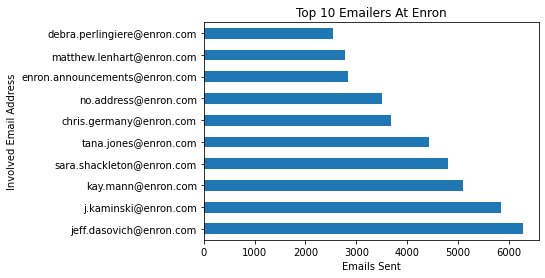

In [115]:
df['sender'].value_counts()[:n]

df['sender'].value_counts()[:10].plot(kind='barh')
plt.xlabel("Emails Sent")
plt.ylabel("Involved Email Address")
plt.title("Top 10 Emailers At Enron")
add_value_label(df['sender'])

In [88]:
pd.Timestamp.min

Timestamp('1677-09-21 00:12:43.145224193')

In [89]:
pd.Timestamp.max

Timestamp('2262-04-11 23:47:16.854775807')

In [92]:
df['date2'] = pd.to_datetime(df['date'], errors = 'coerce')

In [95]:
df[df['date2'].isna()] #Test

,mid,sender,date,message_id,subject,body,folder,date2
563,1189,enron_update@concureworkplace.com,"0001-11-19 08:16:20, 2021, 2021",<11353551.1075862911607.JavaMail.evans@thyme>,<<Concur Expense Document>> - TEST JHYATT,The following expense report is ready for appr...,"KHYATT (Non-Privileged)Hyatt, KevinInbox",NaT
1519,2145,ipayit@enron.com,"0002-01-14 15:05:25, 2021, 2021",<29836469.1075860859272.JavaMail.evans@thyme>,Action Requested: Invoice Requires Coding/Iss...,Please do not reply to this e-mail.You are rec...,"Kevin_Hyatt_Mar2002Hyatt, KevinDeleted Items",NaT
14754,23520,enron_update@concureworkplace.com,"0001-11-30 03:46:37, 2021, 2021",<26103734.1075855443715.JavaMail.evans@thyme>,<<Concur Expense Document>> - TS112901,The Payment status has changed on the followin...,"Theresa_Staab_Jan2002_1Staab, TheresaInbox",NaT
15093,23859,enron_update@concureworkplace.com,"0001-12-21 22:31:35, 2021, 2021",<9513564.1075855440737.JavaMail.evans@thyme>,<<Concur Expense Document>> - TS112901,The Payment status has changed on the followin...,"Theresa_Staab_Jan2002_1Staab, TheresaDeleted I...",NaT
15094,23860,enron_update@concureworkplace.com,"0001-12-24 22:26:36, 2021, 2021",<19853322.1075855440714.JavaMail.evans@thyme>,<<Concur Expense Document>> - TS112901,The Payment status has changed on the followin...,"Theresa_Staab_Jan2002_1Staab, TheresaDeleted I...",NaT
...,...,...,...,...,...,...,...,...
237396,380718,enron_update@concureworkplace.com,"0001-11-27 09:25:46, 2021, 2021",<2210559.1075862187440.JavaMail.evans@thyme>,<<Concur Expense Document>> - November 2001,The following expense report is ready for appr...,"RBUY (Non-Privileged)Buy, RickDeleted Items",NaT
237425,380747,enron_update@concureworkplace.com,"0002-01-28 07:29:50, 2021, 2021",<29565755.1075840377974.JavaMail.evans@thyme>,<<Concur Expense Document>> - Pre-Petition Fin...,The following expense report is ready for appr...,\rbuyDeleted Items,NaT
237429,380751,enron_update@concureworkplace.com,"0002-01-28 13:00:10, 2021, 2021",<3863731.1075840377700.JavaMail.evans@thyme>,<<Concur Expense Document>> - Bradford Larson,The following expense report is ready for appr...,\rbuyDeleted Items,NaT
247725,398326,payables.ibuyit@enron.com,"0001-05-30 13:10:06, 2021, 2021",<415762.1075852658314.JavaMail.evans@thyme>,Action Requested: Invoice Requires Coding/Iss...,Please do not reply to this e-mail.You are rec...,JSKILLIN (Non-Privileged)Deleted Items,NaT


In [86]:
df['date'] = pd.to_datetime(df['date']).dt.date
print(df)

OutOfBoundsDatetime: ignored

In [79]:
try:
    df['date'] = pd.to_datetime(df['date']).dt.date
    df['date'].value_counts()[:20].plot(kind='line')
    plt.xlabel("Emails Sent")
    plt.xticks(rotation = 45)
    plt.ylabel("Involved Email Address")
    plt.title("Top 10 Emailers At Enron")
except Exception:
    pass

In [83]:
pd.to_datetime(df['date'], errors = 'coerce')

0        2000-01-21 04:51:00
1        2000-01-24 01:37:00
2        2000-01-24 02:06:00
3        2000-02-02 10:21:00
4        2000-02-07 22:16:00
                 ...        
252754   2002-02-06 16:51:29
252755   2002-02-06 17:17:39
252756   2002-02-06 20:09:37
252757   2002-02-07 04:38:13
252758   2002-02-07 05:38:14
Name: date, Length: 252759, dtype: datetime64[ns]

In [59]:
from datetime import datetime,date
date_str = df['date']  
format_string = "%Y-%m-%d"
then = datetime.strftime(date_str,format_string) 

TypeError: ignored

In [113]:
import matplotlib.pyplot as plt
import numpy as np

In [26]:
sql='''
SELECT * from message;
'''
# Load the data into a DataFrame
df = pd.read_sql_query(sql, conn)
df

df2 = df.groupby(['date']).count()
df2

,mid,sender,message_id,subject,body,folder
date,,,,,,
0001-05-30 13:10:06,2,2,2,2,2,2
0001-06-18 09:40:11,1,1,1,1,1,1
0001-07-24 00:11:44,1,1,1,1,1,1
0001-08-01 15:30:11,1,1,1,1,1,1
0001-08-06 00:06:06,1,1,1,1,1,1
...,...,...,...,...,...,...
2020-12-29 12:53:46,1,1,1,1,1,1
2043-12-28 11:34:12,1,1,1,1,1,1
2044-01-02 15:46:00,1,1,1,1,1,1


In [22]:
df2 = df_data.groupby(['date']).count()

NameError: ignored

Text(0.5, 1.0, 'Top 10 Emailers At Enron')

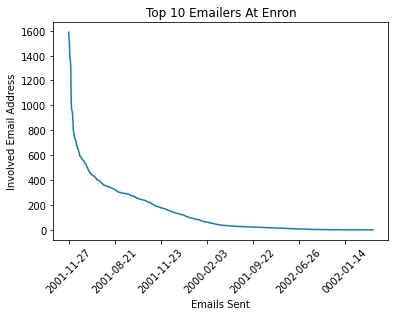

In [101]:
sql='''
SELECT date(date)
 FROM message
 GROUP BY date
 ORDER BY date;
'''
# Load the data into a DataFrame
df1 = pd.read_sql_query(sql, conn)
df1

df1['date(date)'].value_counts().plot(kind='line')
plt.xlabel("Emails Sent")
plt.xticks(rotation = 45)
plt.ylabel("Involved Email Address")
plt.title("Top 10 Emailers At Enron")

Text(0.5, 1.0, 'Top 10 Emailers At Enron')

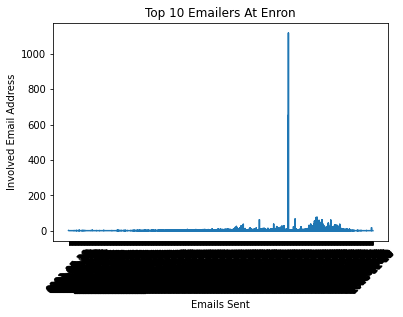

In [111]:
sql='''
SELECT date(date), count(mid) AS message_count
 FROM message
 GROUP BY date
 ORDER BY date;
'''
# Load the data into a DataFrame
df1 = pd.read_sql_query(sql, conn)
df1

plt.plot(df1['date(date)'],df1['message_count'])
ax.set_xticks(np.arange(0, +1, 5))
plt.xlabel("Emails Sent")
plt.xticks(rotation = 45)
plt.ylabel("Involved Email Address")
plt.title("Top 10 Emailers At Enron")